In [18]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
N_PORTFOLIOS = 10 ** 5
N_DAYS = 2932
RISKY_ASSETS = ['PLUG', 'BE', 'BLDP', 'HOLI']
RISKY_ASSETS.sort()
START_DATE = '2010-01-01'
END_DATE = '2021-3-16'
n_assets = len(RISKY_ASSETS)


In [20]:
prices_df = yf.download(RISKY_ASSETS, start=START_DATE, end=END_DATE, interval="1wk", adjusted=False)

[*********************100%***********************]  4 of 4 completed


In [21]:
returns_df = prices_df['Adj Close'].pct_change().dropna()
avg_returns = returns_df.mean() * N_DAYS
cov_mat = returns_df.cov() * N_DAYS


In [22]:
np.random.seed(1)
weights = np.random.random(size=(N_PORTFOLIOS, n_assets))
weights /= np.sum(weights, axis=1)[:, np.newaxis]

In [23]:
portf_rtns = np.dot(weights, avg_returns)
portf_vol = []

for i in range(0, len(weights)):
    portf_vol.append(np.sqrt(np.dot(weights[i].T,
                                    np.dot(cov_mat, weights[i]))))
portf_vol = np.array(portf_vol)
portf_sharpe_ratio = portf_rtns / portf_vol


In [24]:
portf_results_df = pd.DataFrame({'returns': portf_rtns,
                                 'volatility': portf_vol,
                                 'sharpe_ratio':
                                 portf_sharpe_ratio})

In [25]:
N_POINTS = 0
portf_vol_ef = []
indices_to_skip = []
portf_rtns_ef = np.linspace(portf_results_df.returns.min(),
 portf_results_df.returns.max(),
 N_POINTS)
portf_rtns_ef = np.round(portf_rtns_ef, 2)
portf_rtns = np.round(portf_rtns, 2)
for point_index in range(N_POINTS):
    if portf_rtns_ef[point_index] not in portf_rtns:
         indices_to_skip.append(point_index)
    continue
    matched_ind = np.where(portf_rtns == portf_rtns_ef[point_index])

    portf_vol_ef.append(np.min(portf_vol[matched_ind]))

portf_rtns_ef = np.delete(portf_rtns_ef, indices_to_skip)



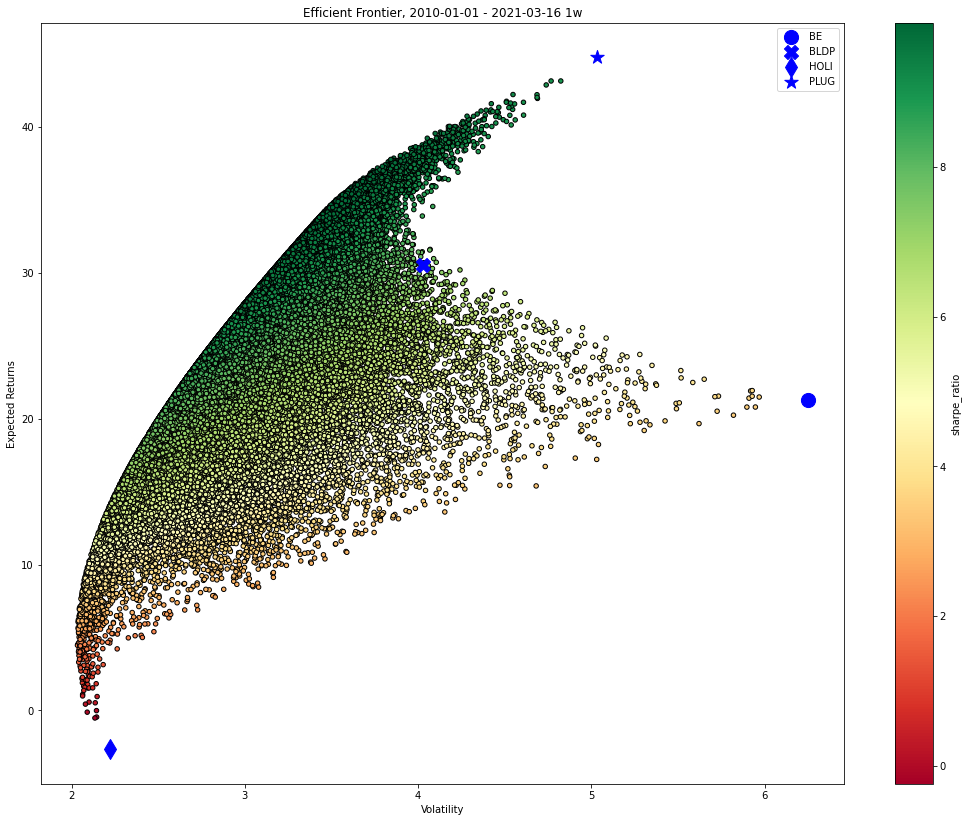

In [27]:
MARKS = ['o', 'X', 'd', '*']

fig, ax = plt.subplots(figsize=(18,14))

portf_results_df.plot(kind='scatter', x='volatility',
                      y='returns', c='sharpe_ratio',
                      cmap='RdYlGn', edgecolors='black',
                      ax=ax)

ax.set(xlabel='Volatility',
       ylabel='Expected Returns',
       title='Efficient Frontier, 2010-01-01 - 2021-03-16 1w')

ax.plot(portf_vol_ef, portf_rtns_ef, 'b--')

for asset_index in range(n_assets):
    ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]),
               y=avg_returns[asset_index],
               marker=MARKS[asset_index],
               s=200,
               color='blue',
               label=RISKY_ASSETS[asset_index])
ax.legend()